In [ ]:
# Danila Valko
# April 2024

# setup

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings("ignore")
sfmt = StrMethodFormatter('{x:,.2f}')
xfmt = ScalarFormatter(useMathText=True)
xfmt.set_powerlimits((0,0))
xfmt1 = ScalarFormatter(useMathText=True)
xfmt1.set_powerlimits((0,0))

In [ ]:
!git clone https://github.com/Ellariel/mango_hybit.git

Cloning into 'mango_hybit'...
remote: Enumerating objects: 1032, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 1032 (delta 17), reused 17 (delta 12), pack-reused 1003
Receiving objects: 100% (1032/1032), 30.01 MiB | 10.42 MiB/s, done.
Resolving deltas: 100% (649/649), done.


In [ ]:
def _regplot(ax, x, y, data, labels=None):
    ax = sns.regplot(ax=ax, x=x, y=y, data=data, truncate=False, order=1,# x_jitter=0.1, y_jitter=0.1,
                    scatter_kws={'edgecolor': "black", 'color': 'none', 'alpha': 0.03},
                    line_kws={"color": "red"})
    if labels:
      ax.set_xlabel(labels[x])
      ax.set_ylabel(labels[y])
    return ax

In [ ]:
base_dir = './'
base_dir = './mango_hybit'
results_dir = os.path.join(base_dir, 'scalability/results')
scalability_time = pd.read_csv(os.path.join(results_dir, 'scalability_time.csv'))
simulation_time = pd.read_csv(os.path.join(results_dir, 'simulation_time.csv'))

# figures

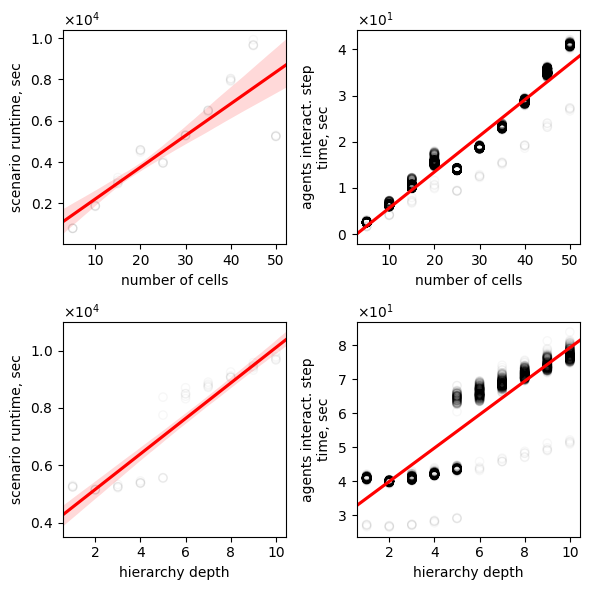

In [ ]:
depth = 1
cells_count = 50
labels = {'sim':{'cells_count' : 'number of cells',
                 'hierarchy_depth' : 'hierarchy depth',
                 'sim_time' : 'scenario runtime, sec',
},
          'sca':{'cells_count' : 'number of cells',
                 'hierarchy_depth' : 'hierarchy depth',
                 'agents_time' : 'agents interact. step\ntime, sec',
}}
sim_time = simulation_time[simulation_time['hierarchy_depth'] == depth]
sc_time = scalability_time[scalability_time['hierarchy_depth'] == depth]
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(221)
ax.yaxis.set_major_formatter(xfmt1)
ax = _regplot(ax, "cells_count", "sim_time", sim_time, labels['sim'])
ax = fig.add_subplot(222)
ax.yaxis.set_major_formatter(xfmt)
ax = _regplot(ax, "cells_count", "agents_time", sc_time, labels['sca'])

sim_time = simulation_time[simulation_time['cells_count'] == cells_count]
sc_time = scalability_time[scalability_time['cells_count'] == cells_count]
ax = fig.add_subplot(223)
ax.yaxis.set_major_formatter(xfmt1)
ax = _regplot(ax, "hierarchy_depth", "sim_time", sim_time, labels['sim'])
ax = fig.add_subplot(224)
ax.yaxis.set_major_formatter(xfmt)
ax = _regplot(ax, "hierarchy_depth", "agents_time", sc_time, labels['sca'])

plt.tight_layout()
plt.show()